## Classification

* Supervised machine learning model, used when the target data is categorical.
    * Binary Classification --> target data terdiri dari 2 kategori (kanker ganas/jinak; kredit macet/lancar; lulus/tidak lulus,dst)  
    * Multiclass Classification --> target data terdiri lebih dari 2 kategori. (puas/biasa saja/tidak puas; kelas 1/kelas 2/kelas 3/kelas 4, dst)  

<center><img src='example.png' width= 600 length = 800><\center>  

Some models of classification:  
* Logistic regression  
* Decision tree  
* K-Nearest Neighbour  
* Support Vector Machine  
* Random Forest, dst  

## Logistics Regression

1. Binary Logistic Regression, binary label  
2. Multinomial Logistic Regression, multinomial label  
3. Ordinal Logistic Regression, ordinal label  



### Binary Logistic Regression
* Mencari probability/success rate terjadinya sesuatu 
* Binary label/target data  
>Success - 0  
>Failure - 1   
>ex: pada credit scoring, label 1 untuk kredit macet dan label 0 untuk kredit yang tidak macet  

![image](https://www.saedsayad.com/images/LogReg_1.png)

* Logistic Regression juga bisa digunakan untuk mencari pengaruh suatu feature terhadap peluang terjadinya sesuatu.
> * Misal, pada credit scoring, kita bisa menghitung bahwa pria memiliki odd ratio 3 kali lebih besar untuk gagal bayar dibanding wanita.

## Let's try logistic regression

Analyze data bankloan.csv

target: default
feature: employ, debtinc,creddebt,othdebt

In [1]:
import pandas as pd
import numpy as np

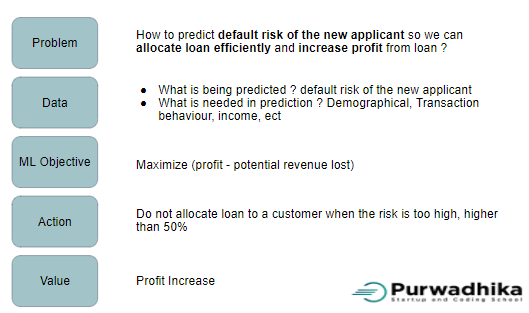

In [2]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [3]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']
X = bankloan[fitur]
y = bankloan[target]

X.describe()

### Modeling

In [4]:
import statsmodels.api as sm

In [5]:
sm_logit = sm.Logit(y,sm.add_constant(X))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [6]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.2844
Time:                        09:45:58   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

the is no problem in multicollinearity

### Model Interpretation

In [9]:
# employ coef= -0.2436
np.exp(0.2436*1)
# When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times

1.2758338948511923

In [10]:
# debtinc coef= 0.085
np.exp(0.0885*1)
# When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times

1.0925342526104793

In [11]:
# creddebt 0.5041
np.exp(0.5041*5)
# When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times

12.434812515742879

LLR-Test:  

B1, B2, B3, B4 : P-Value of the Log-Likelihood Ratio is below 0.05. We have enough evidence that minimal either employ, debtinc, creddebt, othdebt have significant effect to credit default rate.  

Wald Test:  
* B0 : P-Value of the partial test is below 0.05. We need B0 in the model  
* B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that employ decrease default rate  
* B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that debtinc increase default rate.  
* B3 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that creddebt increase default rate.  
* B3 : P-Value of the partial test is greater than 0.05. With significant level of 5%, we dont have enough evidence that othdebt has significant effect to default rate  

Parameter Estimate:  
* B1 = -0.2436 : Employment decrease default rate. When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times 
* B2 = 0.0885 : Ratio debt to income increase default rate. When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times
* B3 = 0.5041 :  creddebt increase default rate. When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times
* It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:  

Pseudo R-Square = 28.44% : This model can explain 28.33% variation of default rate.  

## Validation

Ketika melakukan pemodelan menggunakan machine learning, model divalidasi nilai prediksinya menggunakan gugus data yang tidak terlibat sama sekali dalam pemodelan. Data dibagi menjadi dua bagian yaitu data training dan data testing dengan proporsi masing-masing misalkan 70% dan 30%. Gugus data training digunakan untuk membangun model sedangkan gugus data testing untuk validasi.


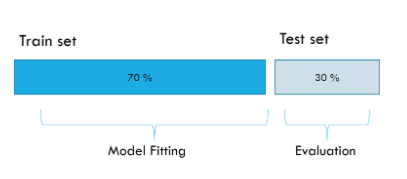

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y,   #each set contains approximately the same percentage of samples of each target class as the complete set.
    test_size = 0.2, 
    random_state = 2020)

In [14]:
sm_logit_train = sm.Logit(y_train,sm.add_constant(X_train))
result_train = sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.411145
         Iterations 7


In [15]:
 y_predict_proba = result_train.predict(sm.add_constant(X_test))
 y_predict_class = np.where(y_predict_proba>0.5,1,0)

print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

This model is able to predict default correctly about 8 of 10 people

## K Nearest Neighbor (KNN)

Teknik ini bekerja dengan memberikan hasil prediksi berdasarkan kelas mayoritas dari beberapa pengamatan yang serupa atau tetangga terdekat. Meskipun termasuk teknik yang sangat sederhana dan tidak menghasilkan model, KNN mampu memberikan akurasi yang cukup bersaing dengan pendekatan lain. Hanya saja KNN seringkali kurang praktikal karena memerlukan memori yang besar.  

Pada dasarnya KNN dapat diterapkan untuk klasifikasi maupun regresi. KNN merupakan suatu metode yang bersifat non-parametrik artinya knn tidak menghasilkan persamaan seperti pada regresi linier dan regresi logistik.

![image](https://www.kdnuggets.com/wp-content/uploads/rapidminer-knn-image1.jpg)



Let's try!
Analyze data white_wine.csv with KNN where k=3  
Target: quality  (apakah quality> 6 atau tidak)  
feature: density, alcohol  
Validate data using accuracy in 20% test data  

In [16]:
wine=pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [17]:
import seaborn as sns

In [18]:
wine['label']= [1 if i>6 else 0 for i in wine['quality']]

In [19]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,0


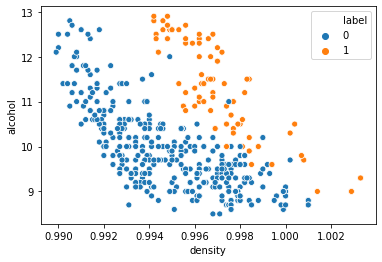

In [20]:
sns.scatterplot(x='density', y='alcohol', data=wine, hue='label')

In [21]:
wine[['alcohol','density']].isnull().sum()

alcohol    1
density    0
dtype: int64

In [22]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace=True)

In [23]:
wine[['alcohol','density']].isna().sum()

alcohol    0
density    0
dtype: int64

In [24]:
X_train,X_test,y_train,y_test= train_test_split(
    wine[['density','alcohol']],wine['label'],
    stratify= wine['label'],
    test_size=0.2,
    random_state=2020)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict_class=knn.predict(X_test)

In [27]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9038461538461539


## Scaling

KNN use distance to decide which one is nearest neighbor
> Given X is Area with unit of hectare
> Given Y is Corn Production with unit of kwintals.

How to compare distance between the two?  

Use scaling:  

**Min Max scaling**  
Dengan metode ini data ditransformasi menjadi memiliki rentang tertentu misalnya dari 0 hingga 1. Cara yang dilakukan untuk mentransformasi adalah setiap data dikurangi dengan nilai minimal setelah itu data dibagi dengan nilai selisih antara data maksimal dengan data minimal. Rentang ini tentu tidak terbatas hanya pada 0 dan 1 tetapi bisa diatur lebih leluasa misalkan antara 0 hingga 2, antara 1 hingga 2 dan sebagainya.   

**Standard Scaler**  
Data ditransformasi sehingga memiliki nilai rata-rata 0 dan nilai standar deviasi 1. Setiap data dari variabel tertentu dikurangi dengan rata-ratanya lalu dibagi dengan nilai standar deviasinya.

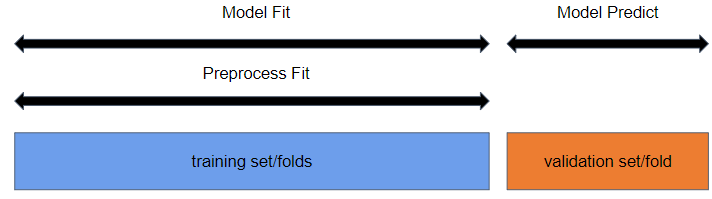

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler =MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_predict_class=knn.predict(X_test_scaled)

In [31]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9807692307692307


Accuracy model naik dari 0.90 menjadi 0.98

### Exercise:

Gunakan cancer_data untuk membuat model prediksi apakah suatu tumor merupakan tumor ganas atau tumor jinak. Bandingkan hasil akurasi menggunakan log regresi dan KNN, manakan model yang lebih cocok untuk cancer_data? (Gunakan hanya feature yang memiliki _mean pada namanya)

## Choose Factor K
<img src= 'KNN.png' width=500 height=300>

How to choose?
* Tips 1: Use odd number of K  
* Tips 2: Evaluate using validation data set  


In [32]:
import matplotlib.pyplot as plt

In [55]:
# Jumlah K terbaik biasanya ada disekitar akar dari jumlah data
wine.shape[0]**.5

22.80350850198276

In [71]:
k= range(1,50,2)
testing_accuracies=[]
training_accuracies=[]
score=0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train,y_predict_train))

    y_predict_test= knn.predict(X_test_scaled)
    acc_score= accuracy_score(y_test,y_predict_test)
    testing_accuracies.append(acc_score)

    if score<acc_score:
        score=acc_score
        best_k=i



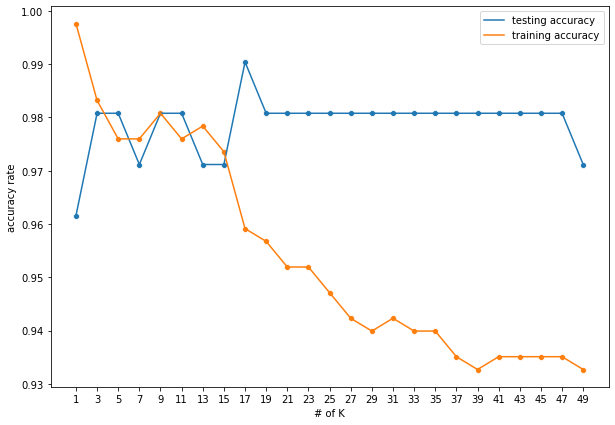

In [73]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xlabel('# of K')
plt.ylabel('accuracy rate')
plt.xticks(list(k))
plt.show()

In [70]:
print('best k:', best_k)
print('accuracy:', score)

best k: 17
accuracy: 0.9903846153846154


## Decision Tree Classifier  

Essentially, Decision Tree is a hierarchy of if/else questions, leading to a decision.

**Why do we use Decision Tree?**

* It’s also a nonparametric approach like KNN  
>* we don’t need to make any strong assumption about the form of the model  
>* it’s more flexible approach to capture any type of relationship.  
* You want a fast, flexible model with high interpretability  

<img src= 'https://eloquentarduino.github.io/wp-content/uploads/2020/08/DecisionTree.png' width=500 height=300>




Decision tree terminologies

<img src= 'tree.png' width=500 height=300>

Proses splitting dihentikan ketika sudah memasuki kondisi tertentu. Proses splitting perlu dibatasi untuk mencegah agar pohon tidak terlalu kompleks. Kondisi-kondisi tersebut di antaranya:  
* (pertama) satu node sudah memiliki kelas yang sama semua  
* (kedua) Banyaknya data pada suatu node sebelum splitting sudah lebih dari nilai tertentu   
* (ketiga) Banyaknya data pada suatu node setelah splitting sudah lebih dari nilai tertentu  
* Tree sudah mencapai tingkat kedalaman yang kita inginkan  


Ada beberapa hyperparameter yang dapat digunakan untuk mengatur splitting.  
* Minimum sample of node split : minimal banyaknya data pada setiap node  
* Minimum sample of terminal/leaf : minimal banyaknya data pada setiap leaf  
* Maximum depth : maksimal kedalaman pohon  
* Maximum number of terminal : maksimal banyaknya terminal pada pohon  

**How to decide which feature used to split?**  
Gunakan Ukuran heterogenitas.
* Entropy: E(D) = - (p log2 p + q log2 q)   
* Gini: G(D) = pq + qp   
>* D merupakan suatu dataset yang berisi dua kelas YES dan No.  
>* p merupakan proporsi dari kelas YES dan q merupakan proporsi dari kelas NO.  
>* Suatu dataset yang kondisinya YES semua atau NO semua akan memiliki nilai entropy/ gini index 0. Entropy/gini index akan bernilai maksimum ketika setiap kelas ada sama banyaknya (p = 0.5). 

* Yang digunakan untuk menentukan apakah suatu splitter adalah splitter yang baik adalah selisih dari niali heterogenitas dataset dan nilai heterogenitas subset  
>* Entropy: Information Gain = E(D) -  E(Split)
>* Gini: Gini impurity = G(Dataset) -  G(Split)




## Let's Try Decision Tree Classifier

Analyze white_wine.csv  
Apply Decision Tree Classification Method (max_depth = 2)  
target : quality (quality > 6 → Y = 1)  
features : density alcohol  
Validate the model using accuracy in 20% testing data  
Apply scaling and Validate the model using accuracy in 20% testing data  
Check the performance: is there any difference whether we applied scaling or not ?  
Check the tree: is there any difference whether we applied scaling or not ?  


### Without Scaling

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [76]:
wine['label']=[1 if i>6 else 0 for i in wine['quality']]

In [77]:
X=wine[['density','alcohol']]
y=wine['label']

In [79]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    stratify=y,
    test_size=0.2,
    random_state=2020)

In [81]:
tree=DecisionTreeClassifier(
    criterion='gini',
    max_depth= 2
)
tree.fit(X_train,y_train)
y_predict_class=tree.predict(X_test)

In [82]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

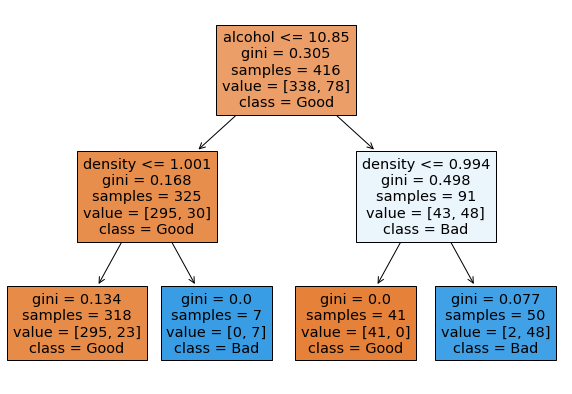

In [83]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names= list(X), class_names= ['Good','Bad'], filled=True)
plt.show()

## With Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler =MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
tree = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2
)
tree.fit(X_train_scaled,y_train)
y_predict_class = tree.predict(X_test_scaled)

In [45]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


The accuracy doesn't change

In [ ]:
0-100 -->0, 20,20,80,80,90,90,30,100 -> dibagi >50 -> 80,80,90,100
minmaxsclare-> 0,0.2,0.2,0.8,0.8,0.9,0.3,1 --> dibagi >0.5 --> 0.8,0.8,0.9,1

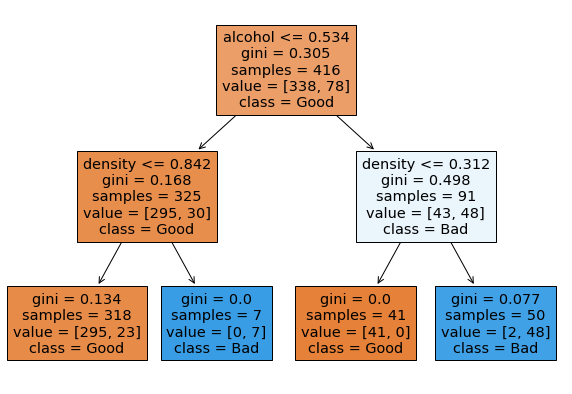

In [46]:
plt.figure(figsize = (10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Good','Bad'], filled = True)
plt.show()

## Exercise

Find the best K for KNN model with cancer_data.csv.  
Use decision tree classifier on cancer_data.csv, compare the accuracy with KNN, which one is better?  

> Use features with _mean in it, 20% data test and random state 2020

Kirim ke Brigita.gems@gmail.com  
subject: Latihan Classification

## More to Read
https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742#  
https://en.wikipedia.org/wiki/E_(mathematical_constant  
https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#  
https://towardsdatascience.com/understanding-decision-tree-classifier-7366224e033b